# Importing Libraries

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import mpl_toolkits
import statsmodels.api as sm
import statsmodels.formula.api as smf
%matplotlib inline

#importing necessary models and libraries

#Math tools
from scipy import stats
from scipy.stats import skew,norm  # for some statistics
from scipy.special import boxcox1p
from scipy.stats import boxcox_normmax
import scipy.stats as stats


#Visualizing tools

from sklearn.pipeline import make_pipeline
from sklearn.preprocessing import RobustScaler
from sklearn.model_selection import KFold, cross_val_score
from sklearn.metrics import mean_squared_error
from sklearn.preprocessing import LabelEncoder
import warnings
warnings.filterwarnings(action="ignore")


# Uploading the Data Set

In [2]:
raw_df = pd.read_csv('Housing_prices_data.csv')

# Observing the first  rows of the data set

In [3]:
raw_df.head(20)

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,1,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2008,WD,Normal,208500
1,2,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,5,2007,WD,Normal,181500
2,3,60,RL,68.0,11250,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,9,2008,WD,Normal,223500
3,4,70,RL,60.0,9550,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2006,WD,Abnorml,140000
4,5,60,RL,84.0,14260,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,12,2008,WD,Normal,250000
5,6,50,RL,85.0,14115,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,MnPrv,Shed,700,10,2009,WD,Normal,143000
6,7,20,RL,75.0,10084,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,8,2007,WD,Normal,307000
7,8,60,RL,NaN,10382,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,Shed,350,11,2009,WD,Normal,200000
8,9,50,RM,51.0,6120,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,4,2008,WD,Abnorml,129900
9,10,190,RL,50.0,7420,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,1,2008,WD,Normal,118000


# Dependable Variable - Checking for normal distribution

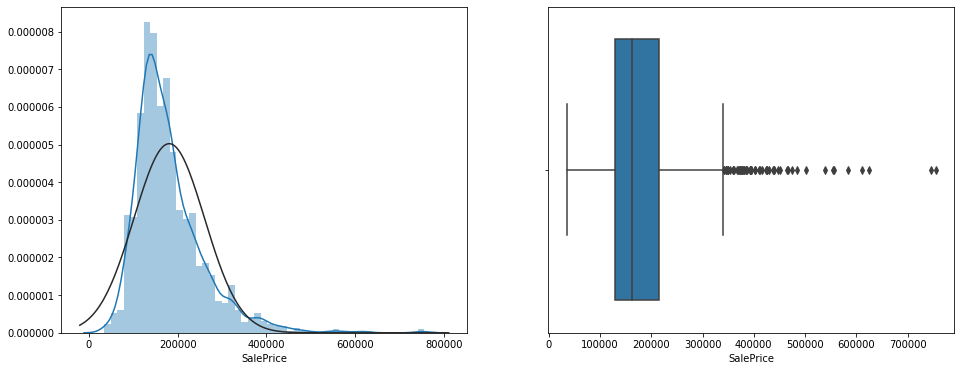

Skewness: 1.8828757597682129
Kurtosis: 6.536281860064529
--------------------------------------
count      1460.000000
mean     180921.195890
std       79442.502883
min       34900.000000
25%      129975.000000
50%      163000.000000
75%      214000.000000
max      755000.000000
Name: SalePrice, dtype: float64


In [4]:
f,ax = plt.subplots(1,2,figsize=(16,6))
sns.distplot(raw_df['SalePrice'],fit=norm,ax=ax[0])
sns.boxplot(raw_df['SalePrice'])
plt.show()

#skewness and kurtosis
print("Skewness: {}".format(raw_df['SalePrice'].skew()))
print("Kurtosis: {}".format(raw_df['SalePrice'].kurt()))
print("--------------------------------------")
print(raw_df['SalePrice'].describe())

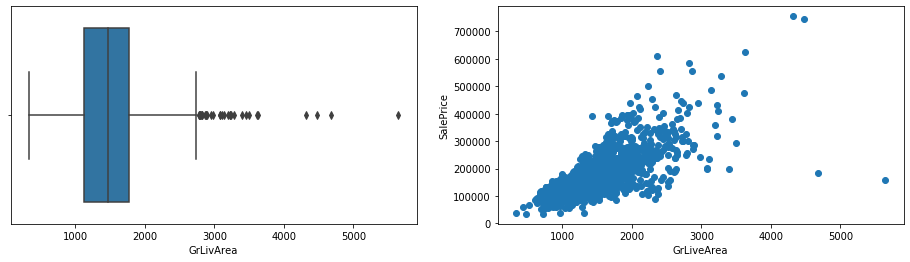

In [5]:
f,ax = plt.subplots(1,2,figsize=(16,4))
sns.boxplot(raw_df['GrLivArea'],ax=ax[0])
plt.scatter(raw_df['GrLivArea'],raw_df['SalePrice'])
plt.xlabel('GrLiveArea')
plt.ylabel('SalePrice')
plt.show()

# Checking for categorial variables which were not classed as "object"

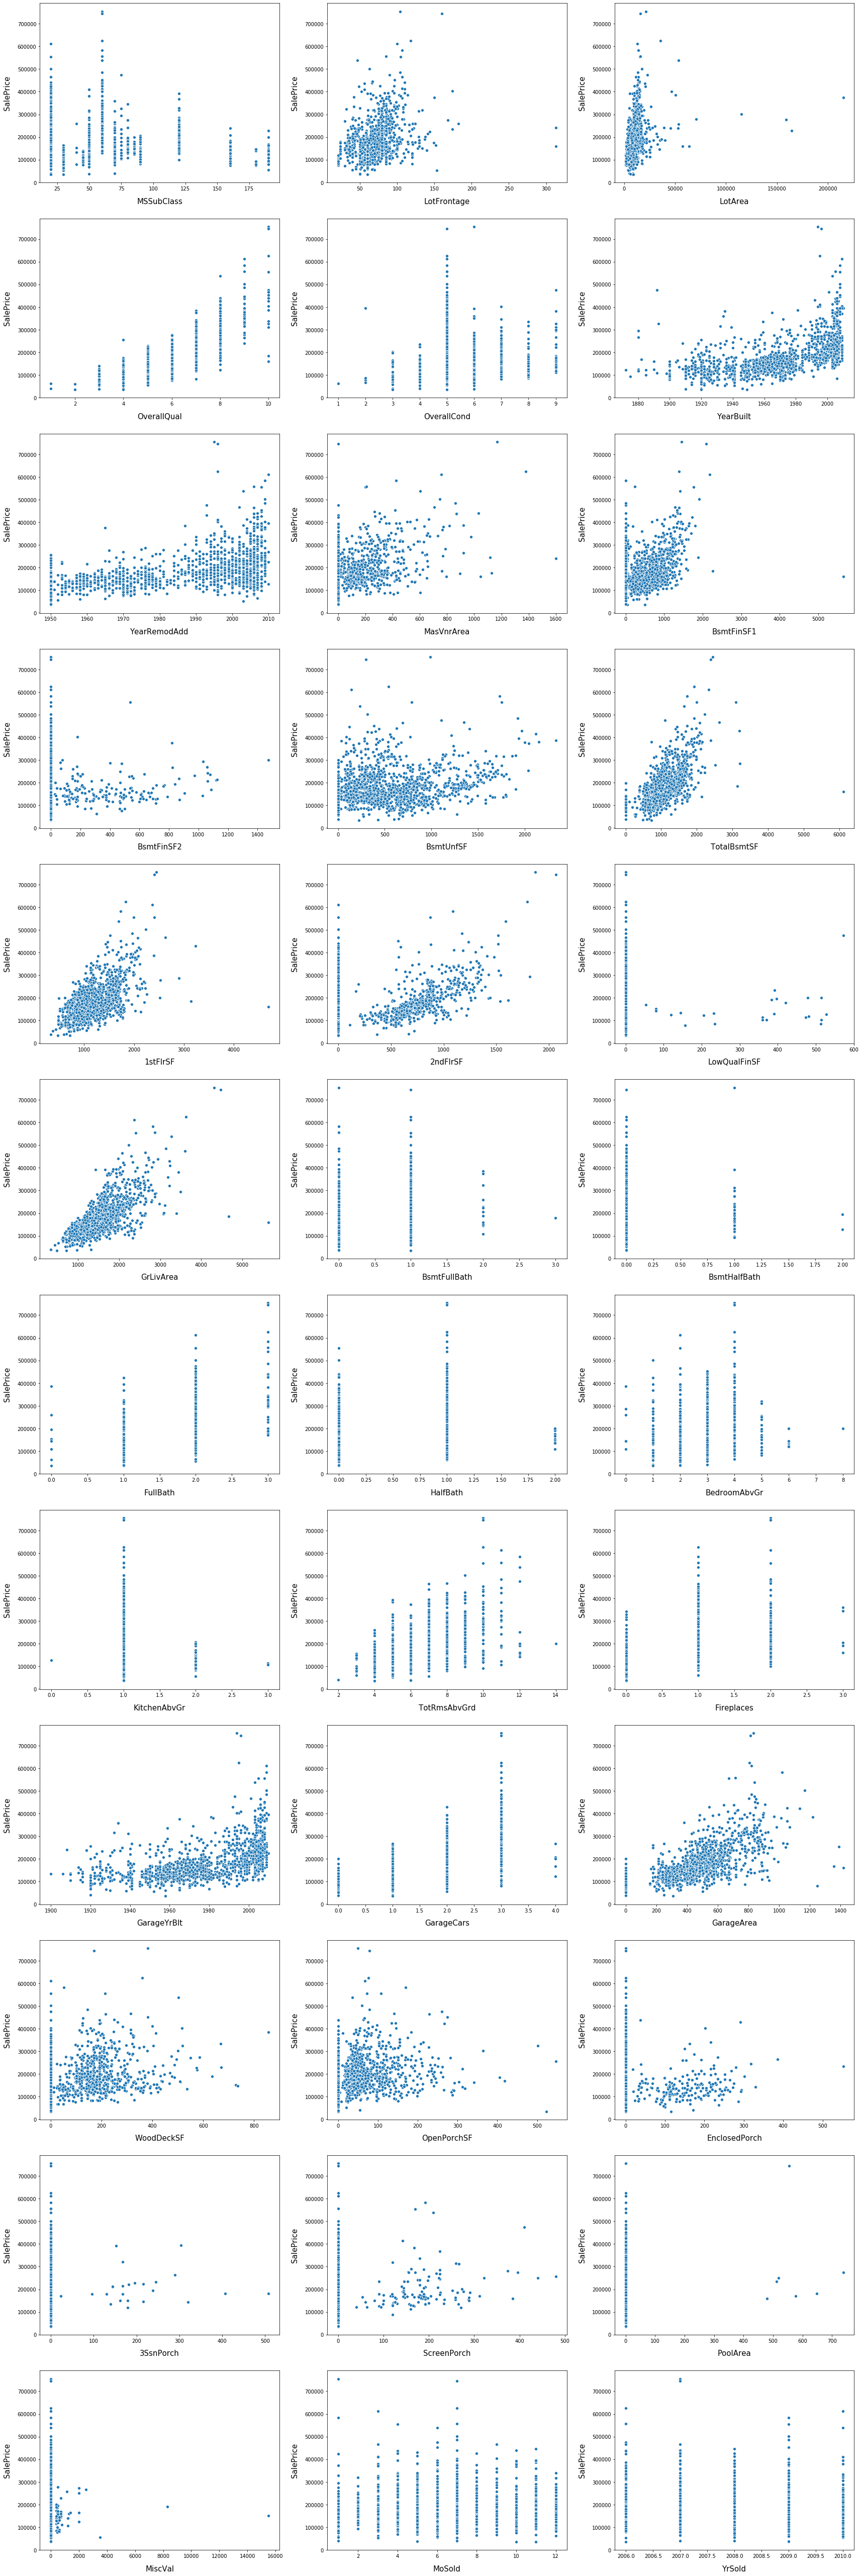

In [6]:
# Finding numeric features - excluding 'object' as we aalready know it is categorical
numeric_cols = raw_df.select_dtypes(exclude='object').columns
numeric_cols_length = len(numeric_cols)  

fig, axs = plt.subplots(ncols=2, nrows=0, figsize=(12, 120))
plt.subplots_adjust(right=2)
plt.subplots_adjust(top=2)

# skiped Id and saleprice feature
for i in range(1,numeric_cols_length-1):
    feature = numeric_cols[i]
    plt.subplot(numeric_cols_length, 3, i)
    sns.scatterplot(x=feature, y='SalePrice', data=raw_df)
    plt.xlabel('{}'.format(feature), size=15,labelpad=12.5)
    plt.ylabel('SalePrice', size=15, labelpad=12.5)
           
plt.show()

Observations:
MSSubClass,MoSold,YrSold - patterns shows it as a category and description meant the same
OverallQual, OverallCond - Ordered value (like ratings)
BsmtFullBath,BsmtHalfBath,FullBath,HalfBath,Fireplaces,BedroomAbvGr,KitchenAvbGr - discrete value(no. of bathrooms)

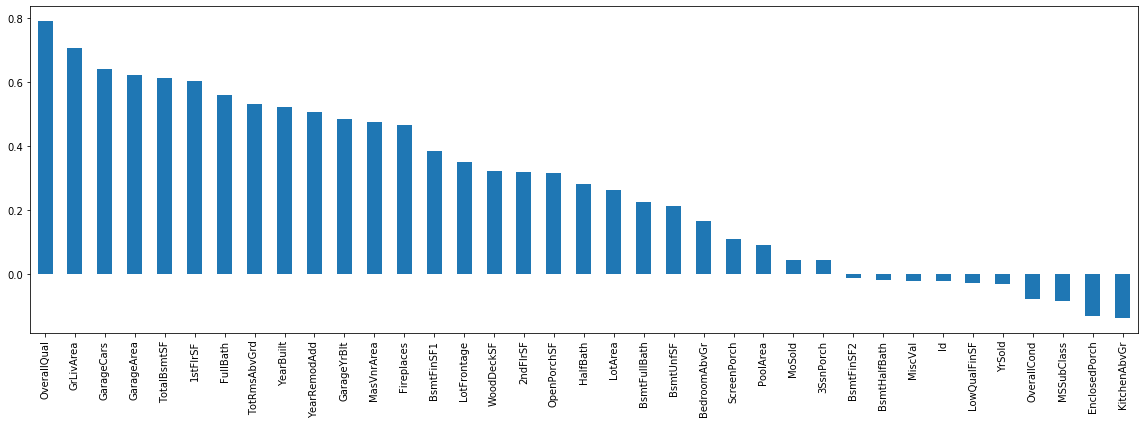

In [7]:
corr = raw_df.select_dtypes(include='number').corr()
plt.figure(figsize=(16,6))
corr['SalePrice'].sort_values(ascending=False)[1:].plot(kind='bar')
plt.tight_layout()

# Acessing overall data information 

In [8]:
raw_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1460 entries, 0 to 1459
Data columns (total 81 columns):
Id               1460 non-null int64
MSSubClass       1460 non-null int64
MSZoning         1460 non-null object
LotFrontage      1201 non-null float64
LotArea          1460 non-null int64
Street           1460 non-null object
Alley            91 non-null object
LotShape         1460 non-null object
LandContour      1460 non-null object
Utilities        1460 non-null object
LotConfig        1460 non-null object
LandSlope        1460 non-null object
Neighborhood     1460 non-null object
Condition1       1460 non-null object
Condition2       1460 non-null object
BldgType         1460 non-null object
HouseStyle       1460 non-null object
OverallQual      1460 non-null int64
OverallCond      1460 non-null int64
YearBuilt        1460 non-null int64
YearRemodAdd     1460 non-null int64
RoofStyle        1460 non-null object
RoofMatl         1460 non-null object
Exterior1st      1460 non-n

# Investigating the size of the dataset (1640 rows, 81 columns)

In [9]:
raw_df.shape

(1460, 81)

In [10]:
pd.set_option('display.max_columns', None)

In [11]:
raw_df.head()

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,LotConfig,LandSlope,Neighborhood,Condition1,Condition2,BldgType,HouseStyle,OverallQual,OverallCond,YearBuilt,YearRemodAdd,RoofStyle,RoofMatl,Exterior1st,Exterior2nd,MasVnrType,MasVnrArea,ExterQual,ExterCond,Foundation,BsmtQual,BsmtCond,BsmtExposure,BsmtFinType1,BsmtFinSF1,BsmtFinType2,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,Heating,HeatingQC,CentralAir,Electrical,1stFlrSF,2ndFlrSF,LowQualFinSF,GrLivArea,BsmtFullBath,BsmtHalfBath,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,KitchenQual,TotRmsAbvGrd,Functional,Fireplaces,FireplaceQu,GarageType,GarageYrBlt,GarageFinish,GarageCars,GarageArea,GarageQual,GarageCond,PavedDrive,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,1,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,Inside,Gtl,CollgCr,Norm,Norm,1Fam,2Story,7,5,2003,2003,Gable,CompShg,VinylSd,VinylSd,BrkFace,196.0,Gd,TA,PConc,Gd,TA,No,GLQ,706,Unf,0,150,856,GasA,Ex,Y,SBrkr,856,854,0,1710,1,0,2,1,3,1,Gd,8,Typ,0,NaN,Attchd,2003.0,RFn,2,548,TA,TA,Y,0,61,0,0,0,0,NaN,NaN,NaN,0,2,2008,WD,Normal,208500
1,2,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,FR2,Gtl,Veenker,Feedr,Norm,1Fam,1Story,6,8,1976,1976,Gable,CompShg,MetalSd,MetalSd,None,0.0,TA,TA,CBlock,Gd,TA,Gd,ALQ,978,Unf,0,284,1262,GasA,Ex,Y,SBrkr,1262,0,0,1262,0,1,2,0,3,1,TA,6,Typ,1,TA,Attchd,1976.0,RFn,2,460,TA,TA,Y,298,0,0,0,0,0,NaN,NaN,NaN,0,5,2007,WD,Normal,181500
2,3,60,RL,68.0,11250,Pave,NaN,IR1,Lvl,AllPub,Inside,Gtl,CollgCr,Norm,Norm,1Fam,2Story,7,5,2001,2002,Gable,CompShg,VinylSd,VinylSd,BrkFace,162.0,Gd,TA,PConc,Gd,TA,Mn,GLQ,486,Unf,0,434,920,GasA,Ex,Y,SBrkr,920,866,0,1786,1,0,2,1,3,1,Gd,6,Typ,1,TA,Attchd,2001.0,RFn,2,608,TA,TA,Y,0,42,0,0,0,0,NaN,NaN,NaN,0,9,2008,WD,Normal,223500
3,4,70,RL,60.0,9550,Pave,NaN,IR1,Lvl,AllPub,Corner,Gtl,Crawfor,Norm,Norm,1Fam,2Story,7,5,1915,1970,Gable,CompShg,Wd Sdng,Wd Shng,None,0.0,TA,TA,BrkTil,TA,Gd,No,ALQ,216,Unf,0,540,756,GasA,Gd,Y,SBrkr,961,756,0,1717,1,0,1,0,3,1,Gd,7,Typ,1,Gd,Detchd,1998.0,Unf,3,642,TA,TA,Y,0,35,272,0,0,0,NaN,NaN,NaN,0,2,2006,WD,Abnorml,140000
4,5,60,RL,84.0,14260,Pave,NaN,IR1,Lvl,AllPub,FR2,Gtl,NoRidge,Norm,Norm,1Fam,2Story,8,5,2000,2000,Gable,CompShg,VinylSd,VinylSd,BrkFace,350.0,Gd,TA,PConc,Gd,TA,Av,GLQ,655,Unf,0,490,1145,GasA,Ex,Y,SBrkr,1145,1053,0,2198,1,0,2,1,4,1,Gd,9,Typ,1,TA,Attchd,2000.0,RFn,3,836,TA,TA,Y,192,84,0,0,0,0,NaN,NaN,NaN,0,12,2008,WD,Normal,250000


In [12]:
raw_df['Utilities'].unique()

array(['AllPub', 'NoSeWa'], dtype=object)

# Data cleaning 

# Finding Missing Values 

In [13]:
raw_df.isna().any()

Id               False
MSSubClass       False
MSZoning         False
LotFrontage       True
LotArea          False
                 ...  
MoSold           False
YrSold           False
SaleType         False
SaleCondition    False
SalePrice        False
Length: 81, dtype: bool

In [14]:
raw_df.isna().sum()

Id                 0
MSSubClass         0
MSZoning           0
LotFrontage      259
LotArea            0
                ... 
MoSold             0
YrSold             0
SaleType           0
SaleCondition      0
SalePrice          0
Length: 81, dtype: int64

In [15]:
#missing data
total = raw_df.isnull().sum().sort_values(ascending=False)
percent = (raw_df.isnull().sum()/raw_df.isnull().count()).sort_values(ascending=False)
missing_data = pd.concat([total, percent], axis=1, keys=['Total', 'Percent'])
missing_data.head(20)

,Total,Percent
PoolQC,1453,0.995205
MiscFeature,1406,0.963014
Alley,1369,0.937671
Fence,1179,0.807534
FireplaceQu,690,0.472603
LotFrontage,259,0.177397
GarageCond,81,0.055479
GarageType,81,0.055479
GarageYrBlt,81,0.055479
GarageFinish,81,0.055479


# Drop variables which are missing exorbitant amounts of values

In [16]:
# drop PoolQC, MiscFeature, Alley, Fence, FireplaceQu, LotFrontage, missing data above 15%. 
drop_missing_df = raw_df
drop_missing_df.drop(["Id","PoolQC", "MiscFeature", "Alley", "Fence", "FireplaceQu", "LotFrontage"], axis = 1, inplace = True)  

In [17]:
drop_missing_df.head(50)

,MSSubClass,MSZoning,LotArea,Street,LotShape,LandContour,Utilities,LotConfig,LandSlope,Neighborhood,Condition1,Condition2,BldgType,HouseStyle,OverallQual,OverallCond,YearBuilt,YearRemodAdd,RoofStyle,RoofMatl,Exterior1st,Exterior2nd,MasVnrType,MasVnrArea,ExterQual,ExterCond,Foundation,BsmtQual,BsmtCond,BsmtExposure,BsmtFinType1,BsmtFinSF1,BsmtFinType2,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,Heating,HeatingQC,CentralAir,Electrical,1stFlrSF,2ndFlrSF,LowQualFinSF,GrLivArea,BsmtFullBath,BsmtHalfBath,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,KitchenQual,TotRmsAbvGrd,Functional,Fireplaces,GarageType,GarageYrBlt,GarageFinish,GarageCars,GarageArea,GarageQual,GarageCond,PavedDrive,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,60,RL,8450,Pave,Reg,Lvl,AllPub,Inside,Gtl,CollgCr,Norm,Norm,1Fam,2Story,7,5,2003,2003,Gable,CompShg,VinylSd,VinylSd,BrkFace,196.0,Gd,TA,PConc,Gd,TA,No,GLQ,706,Unf,0,150,856,GasA,Ex,Y,SBrkr,856,854,0,1710,1,0,2,1,3,1,Gd,8,Typ,0,Attchd,2003.0,RFn,2,548,TA,TA,Y,0,61,0,0,0,0,0,2,2008,WD,Normal,208500
1,20,RL,9600,Pave,Reg,Lvl,AllPub,FR2,Gtl,Veenker,Feedr,Norm,1Fam,1Story,6,8,1976,1976,Gable,CompShg,MetalSd,MetalSd,None,0.0,TA,TA,CBlock,Gd,TA,Gd,ALQ,978,Unf,0,284,1262,GasA,Ex,Y,SBrkr,1262,0,0,1262,0,1,2,0,3,1,TA,6,Typ,1,Attchd,1976.0,RFn,2,460,TA,TA,Y,298,0,0,0,0,0,0,5,2007,WD,Normal,181500
2,60,RL,11250,Pave,IR1,Lvl,AllPub,Inside,Gtl,CollgCr,Norm,Norm,1Fam,2Story,7,5,2001,2002,Gable,CompShg,VinylSd,VinylSd,BrkFace,162.0,Gd,TA,PConc,Gd,TA,Mn,GLQ,486,Unf,0,434,920,GasA,Ex,Y,SBrkr,920,866,0,1786,1,0,2,1,3,1,Gd,6,Typ,1,Attchd,2001.0,RFn,2,608,TA,TA,Y,0,42,0,0,0,0,0,9,2008,WD,Normal,223500
3,70,RL,9550,Pave,IR1,Lvl,AllPub,Corner,Gtl,Crawfor,Norm,Norm,1Fam,2Story,7,5,1915,1970,Gable,CompShg,Wd Sdng,Wd Shng,None,0.0,TA,TA,BrkTil,TA,Gd,No,ALQ,216,Unf,0,540,756,GasA,Gd,Y,SBrkr,961,756,0,1717,1,0,1,0,3,1,Gd,7,Typ,1,Detchd,1998.0,Unf,3,642,TA,TA,Y,0,35,272,0,0,0,0,2,2006,WD,Abnorml,140000
4,60,RL,14260,Pave,IR1,Lvl,AllPub,FR2,Gtl,NoRidge,Norm,Norm,1Fam,2Story,8,5,2000,2000,Gable,CompShg,VinylSd,VinylSd,BrkFace,350.0,Gd,TA,PConc,Gd,TA,Av,GLQ,655,Unf,0,490,1145,GasA,Ex,Y,SBrkr,1145,1053,0,2198,1,0,2,1,4,1,Gd,9,Typ,1,Attchd,2000.0,RFn,3,836,TA,TA,Y,192,84,0,0,0,0,0,12,2008,WD,Normal,250000
5,50,RL,14115,Pave,IR1,Lvl,AllPub,Inside,Gtl,Mitchel,Norm,Norm,1Fam,1.5Fin,5,5,1993,1995,Gable,CompShg,VinylSd,VinylSd,None,0.0,TA,TA,Wood,Gd,TA,No,GLQ,732,Unf,0,64,796,GasA,Ex,Y,SBrkr,796,566,0,1362,1,0,1,1,1,1,TA,5,Typ,0,Attchd,1993.0,Unf,2,480,TA,TA,Y,40,30,0,320,0,0,700,10,2009,WD,Normal,143000
6,20,RL,10084,Pave,Reg,Lvl,AllPub,Inside,Gtl,Somerst,Norm,Norm,1Fam,1Story,8,5,2004,2005,Gable,CompShg,VinylSd,VinylSd,Stone,186.0,Gd,TA,PConc,Ex,TA,Av,GLQ,1369,Unf,0,317,1686,GasA,Ex,Y,SBrkr,1694,0,0,1694,1,0,2,0,3,1,Gd,7,Typ,1,Attchd,2004.0,RFn,2,636,TA,TA,Y,255,57,0,0,0,0,0,8,2007,WD,Normal,307000
7,60,RL,10382,Pave,IR1,Lvl,AllPub,Corner,Gtl,NWAmes,PosN,Norm,1Fam,2Story,7,6,1973,1973,Gable,CompShg,HdBoard,HdBoard,Stone,240.0,TA,TA,CBlock,Gd,TA,Mn,ALQ,859,BLQ,32,216,1107,GasA,Ex,Y,SBrkr,1107,983,0,2090,1,0,2,1,3,1,TA,7,Typ,2,Attchd,1973.0,RFn,2,484,TA,TA,Y,235,204,228,0,0,0,350,11,2009,WD,Normal,200000
8,50,RM,6120,Pave,Reg,Lvl,AllPub,Inside,Gtl,OldTown,Artery,Norm,1Fam,1.5Fin,7,5,1931,1950,Gable,CompShg,BrkFace,Wd Shng,None,0.0,TA,TA,BrkTil,TA,TA,No,Unf,0,Unf,0,952,952,GasA,Gd,Y,FuseF,1022,752,0,1774,0,0,2,0,2,2,TA,8,Min1,2,Detchd,1931.0,Unf,2,468,Fa,TA,Y,90,0,205,0,0,0,0,4,2008,WD,Abnorml,129900
9,190,RL,7420,Pave,Reg,Lvl,AllPub,Corner,Gtl,BrkSide,Artery,Artery,2fmCon,1.5Unf,5,6,1939,1950,Gable,CompShg,MetalSd,MetalSd,None,0.0,TA,TA,BrkTil,TA,TA,No,GLQ,851,Unf,0,140,991,GasA,Ex,Y,SBrkr,1077,0,0,1077,1,0,1,0,2,2,TA,5,Typ,2,Attchd,1939.0,RFn,1,205,Gd,TA,Y,0,4,0,0,0,0,0,1,2008,WD,Normal,118000


In [18]:
drop_missing_df.drop(['Utilities'], axis = 1, inplace = True)

In [19]:
drop_missing_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1460 entries, 0 to 1459
Data columns (total 73 columns):
MSSubClass       1460 non-null int64
MSZoning         1460 non-null object
LotArea          1460 non-null int64
Street           1460 non-null object
LotShape         1460 non-null object
LandContour      1460 non-null object
LotConfig        1460 non-null object
LandSlope        1460 non-null object
Neighborhood     1460 non-null object
Condition1       1460 non-null object
Condition2       1460 non-null object
BldgType         1460 non-null object
HouseStyle       1460 non-null object
OverallQual      1460 non-null int64
OverallCond      1460 non-null int64
YearBuilt        1460 non-null int64
YearRemodAdd     1460 non-null int64
RoofStyle        1460 non-null object
RoofMatl         1460 non-null object
Exterior1st      1460 non-null object
Exterior2nd      1460 non-null object
MasVnrType       1452 non-null object
MasVnrArea       1452 non-null float64
ExterQual        1460 no

In [20]:
drop_missing_df.shape

(1460, 73)

In [21]:
# print value counts for all 'objects' with more than 1 null value
def object_vcs_and_nulls(drop_missing_df):
  for i in drop_missing_df:
    if drop_missing_df[i].dtype == 'O':
      if drop_missing_df[i].isnull().sum() > 0:
        print(drop_missing_df[i].value_counts())  
        print("Number of Null Values: " + str(drop_missing_df[i].isnull().sum()))
        print("Percentage of Nulls = " + str(np.round((drop_missing_df[i].isnull().sum() / 14.60), 2)) + "%")
        print("\n")
      
object_vcs_and_nulls(drop_missing_df)

None       864
BrkFace    445
Stone      128
BrkCmn      15
Name: MasVnrType, dtype: int64
Number of Null Values: 8
Percentage of Nulls = 0.55%


TA    649
Gd    618
Ex    121
Fa     35
Name: BsmtQual, dtype: int64
Number of Null Values: 37
Percentage of Nulls = 2.53%


TA    1311
Gd      65
Fa      45
Po       2
Name: BsmtCond, dtype: int64
Number of Null Values: 37
Percentage of Nulls = 2.53%


No    953
Av    221
Gd    134
Mn    114
Name: BsmtExposure, dtype: int64
Number of Null Values: 38
Percentage of Nulls = 2.6%


Unf    430
GLQ    418
ALQ    220
BLQ    148
Rec    133
LwQ     74
Name: BsmtFinType1, dtype: int64
Number of Null Values: 37
Percentage of Nulls = 2.53%


Unf    1256
Rec      54
LwQ      46
BLQ      33
ALQ      19
GLQ      14
Name: BsmtFinType2, dtype: int64
Number of Null Values: 38
Percentage of Nulls = 2.6%


SBrkr    1334
FuseA      94
FuseF      27
FuseP       3
Mix         1
Name: Electrical, dtype: int64
Number of Null Values: 1
Percentage of Nulls = 0.07%


A

Most of missing values are in the categorical variables. 

# Replacing categorical missing values for median 

In [22]:
clean_df = drop_missing_df
clean_df['GarageCond'].replace(0, np.nan, inplace= True)

In [23]:
clean_df['GarageType'].replace(0, np.nan, inplace= True)

In [24]:
clean_df['GarageYrBlt'].replace(0, np.nan, inplace= True)

In [25]:
clean_df['GarageFinish'].replace(0, np.nan, inplace= True)

In [26]:
clean_df['BsmtQual'].replace(0, np.nan, inplace= True)

In [27]:
clean_df['BsmtCond'].replace(0, np.nan, inplace= True)

In [28]:
clean_df['BsmtExposure'].replace(0, np.nan, inplace= True)

In [29]:
 clean_df['BsmtFinType1'].replace(0, np.nan, inplace= True) 

In [30]:
 clean_df['BsmtFinType2'].replace(0, np.nan, inplace= True) 

In [31]:
median_value=clean_df['GarageYrBlt'].median()
clean_df['GarageYrBlt']=clean_df['GarageYrBlt'].fillna(median_value)

In [32]:
clean_df['GarageCond'].unique()

array(['TA', 'Fa', nan, 'Gd', 'Po', 'Ex'], dtype=object)

In [33]:
clean_df['GarageCond'] = clean_df['GarageCond'].astype('category').cat.codes

In [34]:
clean_df['GarageType'] = clean_df['GarageType'].astype('category').cat.codes

In [35]:
clean_df['GarageFinish'] = clean_df['GarageFinish'].astype('category').cat.codes

In [36]:
clean_df['BsmtQual'] = clean_df['BsmtQual'].astype('category').cat.codes

In [37]:
clean_df['BsmtCond'] = clean_df['BsmtCond'].astype('category').cat.codes

In [38]:
clean_df['BsmtExposure'] = clean_df['BsmtExposure'].astype('category').cat.codes

In [39]:
clean_df['BsmtFinType1'] = clean_df['BsmtFinType1'].astype('category').cat.codes

In [40]:
clean_df['BsmtFinType2'] = clean_df['BsmtFinType2'].astype('category').cat.codes

In [41]:
median_value=clean_df['GarageCond'].median()
clean_df['GarageCond']=clean_df['GarageCond'].fillna(median_value)

In [42]:
median_value=clean_df['GarageType'].median()
clean_df['GarageType']=clean_df['GarageType'].fillna(median_value)

In [43]:
median_value=clean_df['GarageFinish'].median()
clean_df['GarageFinish']=clean_df['GarageFinish'].fillna(median_value)

In [44]:
median_value=clean_df['BsmtQual'].median()
clean_df['BsmtQual']=clean_df['BsmtQual'].fillna(median_value)

In [45]:
median_value=clean_df['BsmtCond'].median()
clean_df['BsmtCond']=clean_df['BsmtCond'].fillna(median_value)

In [46]:
median_value=clean_df['BsmtExposure'].median()
clean_df['BsmtExposure']=clean_df['BsmtExposure'].fillna(median_value)

In [47]:
median_value=clean_df['BsmtFinType1'].median()
clean_df['BsmtFinType1']=clean_df['BsmtFinType1'].fillna(median_value)

In [48]:
median_value=clean_df['BsmtFinType2'].median()
clean_df['BsmtFinType2']=clean_df['BsmtFinType2'].fillna(median_value)

# Double Checking for missing Values

In [49]:
clean_df.isna().any().any()

True

In [50]:
clean_df.isna().any()

MSSubClass       False
MSZoning         False
LotArea          False
Street           False
LotShape         False
                 ...  
MoSold           False
YrSold           False
SaleType         False
SaleCondition    False
SalePrice        False
Length: 73, dtype: bool

In [51]:
clean_df.isna().sum()

MSSubClass       0
MSZoning         0
LotArea          0
Street           0
LotShape         0
                ..
MoSold           0
YrSold           0
SaleType         0
SaleCondition    0
SalePrice        0
Length: 73, dtype: int64

# Removing duplicates 

In [52]:
def Remove(duplicate): 
    final_list = [drop_missing_df] 
    for num in duplicate: 
        if num not in final_list: 
            final_list.append(num) 
    return final_list 

 # Declaring the Continuous and the Categorical variables

In [53]:
cat = ['MSSubclass','MSZoning', 'Street', 'LotShape', 'LandContour', 'Utilities', 'LotConfig', 'LandSlope', 'Neighborhood', 'Condition1', 'Condition2','BldgType',          
'HouseStyle', 'OverallCond','YearBuilt', 'YearRemodAdd', 'YearBuilt', 'YearRemodAdd', 'RoofStyle', 'RoofMatl', 'Exterior1st', 'Exterior2nd', 'MasVnrType', 'MasVnrArea',
'ExterQual', 'ExterCond', 'Foundation', 'BsmtQual', 'BsmtCond', 'BsmtExposure', 'BsmtFinType1', 'BsmtFinType2', 'Heating', 'HeatingQC', 'CentralAir', 'Electrical', 'BsmtFullBath', 
'BsmtHalfBath', 'FullBath', 'HalfBath', 'BedroomAbvGr', 'KitchenQual', 'Functional', 'GarageType', 'GarageYrBlt', 'GarageFinish', 'GarageQual', 'GarageCond', 'PavedDrive''KithcenAbvGr', 
'TotRmsAbvGrd', 'Fireplaces', 'GarageCars', 'MoSold', 'YrSold']
con = ['OverallQual', 'BsmtFinSF1', 'BsmtFinSF2', 'BsmtUnfSF', '1stFlrSF', '2ndFlrSF', 'LowQualFinSF', 'GrLivArea', 'GrLivArea', 'GarageArea', 'WoodDeckSF', 'OpenPorchSF', 'EnclosedPorch', '3SsnPorch', 'ScreenPorch', 'PoolArea', 'MiscVal', 'SaleType', 'SaleCondition', 'SalePrice']       

 # Reset Index Values

In [54]:
drop_missing_df.reset_index(drop=True, inplace=True)

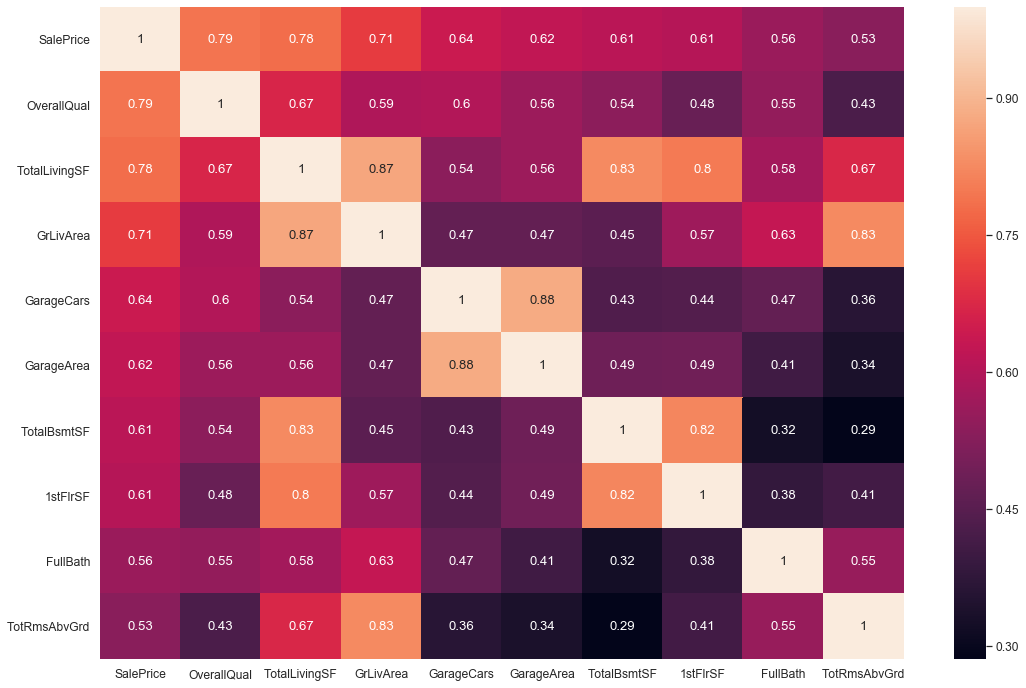

In [61]:
# Correlation of top 10 feature with saleprice
corWithSalePrice = clean_df.corr().nlargest(10,'SalePrice')['SalePrice'].index
f , ax = plt.subplots(figsize = (18,12))
ax = sns.heatmap(clean_df[corWithSalePrice].corr(), annot=True)
bottom, top = ax.get_ylim()
ax.set_ylim(bottom + 0.5, top - 0.5)
plt.show()

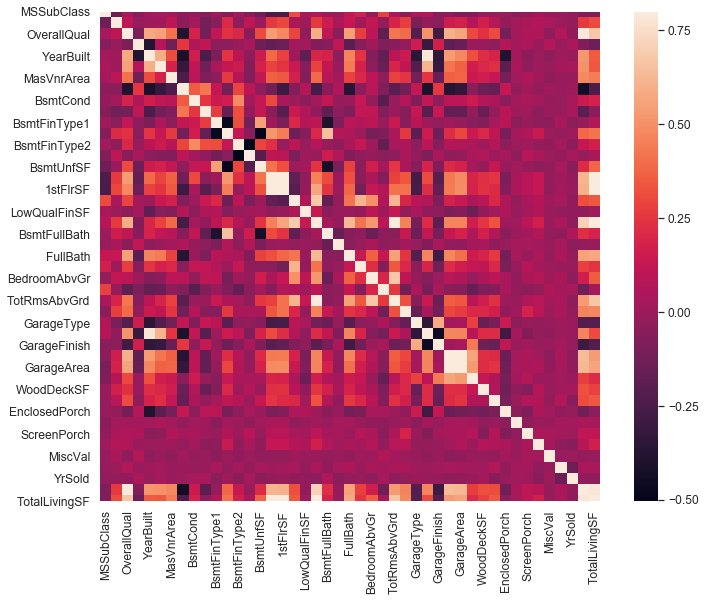

In [63]:
#correlation matrix
corrmat = clean_df.corr()
f, ax = plt.subplots(figsize=(12, 9))
sns.heatmap(corrmat, vmax=.8, square=True);

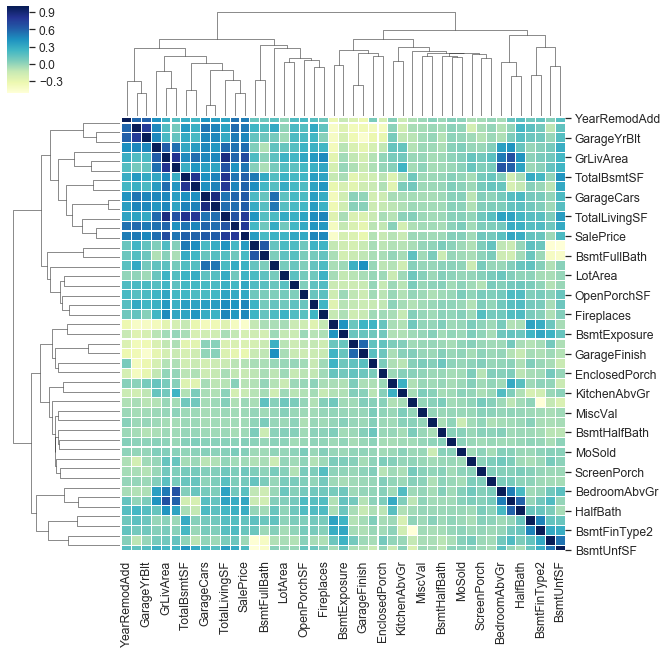

In [64]:
corrmat = clean_df.corr() 
  
cg = sns.clustermap(corrmat, cmap ="YlGnBu", linewidths = 0.1); 
plt.setp(cg.ax_heatmap.yaxis.get_majorticklabels(), rotation = 0) 
  
cg

In [65]:
print(clean_df.corr())

               MSSubClass   LotArea  OverallQual  OverallCond  YearBuilt  \
MSSubClass       1.000000 -0.139781     0.032628    -0.059316   0.027850   
LotArea         -0.139781  1.000000     0.105806    -0.005636   0.014228   
OverallQual      0.032628  0.105806     1.000000    -0.091932   0.572323   
OverallCond     -0.059316 -0.005636    -0.091932     1.000000  -0.375983   
YearBuilt        0.027850  0.014228     0.572323    -0.375983   1.000000   
YearRemodAdd     0.040581  0.013788     0.550684     0.073741   0.592855   
MasVnrArea       0.022936  0.104160     0.411876    -0.128101   0.315707   
BsmtQual        -0.045282 -0.043983    -0.387637     0.254683  -0.415403   
BsmtCond        -0.021027  0.023134     0.185615     0.059735   0.166184   
BsmtExposure    -0.066625 -0.119668    -0.118563     0.112043  -0.239061   
BsmtFinType1     0.008407 -0.050162     0.115691    -0.043096  -0.097924   
BsmtFinSF1      -0.069836  0.214103     0.239666    -0.046231   0.249503   
BsmtFinType2

# Dropping strongly correlated variables in order to avoid confounding effects

In [67]:
# Correlation matrix
corr_matrix = clean_df.corr().abs()

In [69]:
# Select upper triangle of correlation matrix
upper = corr_matrix.where(np.triu(np.ones(corr_matrix.shape), k=1).astype(np.bool))

In [70]:
# Find index of feature columns with correlation greater than 0.90
to_drop = [column for column in upper.columns if any(upper[column] > 0.9)]

In [71]:
to_drop

[]

# EDA

# Grouping Neighbourhoods by Mean and Median

In [55]:
drop_missing_df.groupby('Neighborhood', as_index=True)['SalePrice'].mean().round(2)

Neighborhood
Blmngtn    194870.88
Blueste    137500.00
BrDale     104493.75
BrkSide    124834.05
ClearCr    212565.43
CollgCr    197965.77
Crawfor    210624.73
Edwards    128219.70
Gilbert    192854.51
IDOTRR     100123.78
MeadowV     98576.47
Mitchel    156270.12
NAmes      145847.08
NPkVill    142694.44
NWAmes     189050.07
NoRidge    335295.32
NridgHt    316270.62
OldTown    128225.30
SWISU      142591.36
Sawyer     136793.14
SawyerW    186555.80
Somerst    225379.84
StoneBr    310499.00
Timber     242247.45
Veenker    238772.73
Name: SalePrice, dtype: float64

It is possible to argue that neighbourhood is an important factor when it comes to housing prices. MeadowV for example, presents the lowest prices in the sample, with  an average of US$98K Conversely, homes have the highest Mean prices in the sample (US£335K). 

# Using Median since there are outliers

In [56]:
drop_missing_df.groupby('Neighborhood', as_index=True)['SalePrice'].median()

Neighborhood
Blmngtn    191000
Blueste    137500
BrDale     106000
BrkSide    124300
ClearCr    200250
CollgCr    197200
Crawfor    200624
Edwards    121750
Gilbert    181000
IDOTRR     103000
MeadowV     88000
Mitchel    153500
NAmes      140000
NPkVill    146000
NWAmes     182900
NoRidge    301500
NridgHt    315000
OldTown    119000
SWISU      139500
Sawyer     135000
SawyerW    179900
Somerst    225500
StoneBr    278000
Timber     228475
Veenker    218000
Name: SalePrice, dtype: int64

 The prices overall decreased across the whole sample, indicating that the outliers are on the high end of the pricing spectrum.

# Pricing per square footage

In [57]:
drop_missing_df['TotalLivingSF'] = drop_missing_df['GrLivArea'] + drop_missing_df['TotalBsmtSF'] - drop_missing_df['LowQualFinSF']

In [58]:
drop_missing_df.groupby('Neighborhood', as_index=True)['SalePrice'].mean() / drop_missing_df.groupby('Neighborhood', as_index=True)['TotalLivingSF'].mean()

Neighborhood
Blmngtn    70.801560
Blueste    67.700640
BrDale     60.503746
BrkSide    63.704292
ClearCr    70.917618
CollgCr    75.041421
Crawfor    74.769681
Edwards    57.244515
Gilbert    76.844541
IDOTRR     53.852684
MeadowV    57.569824
Mitchel    65.414034
NAmes      62.495892
NPkVill    65.273189
NWAmes     65.605563
NoRidge    83.769175
NridgHt    89.880781
OldTown    56.503438
SWISU      56.219783
Sawyer     62.675327
SawyerW    71.135475
Somerst    82.650358
StoneBr    91.267401
Timber     78.046283
Veenker    83.460439
dtype: float64

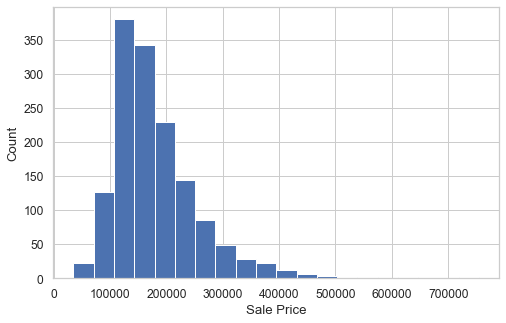

In [59]:
sns.set(style='whitegrid', palette="deep", font_scale=1.1, rc={"figure.figsize": [8, 5]})
sns.distplot(drop_missing_df['SalePrice'], norm_hist=False, kde=False, bins=20, hist_kws={"alpha": 1}
).set(xlabel='Sale Price', ylabel='Count');

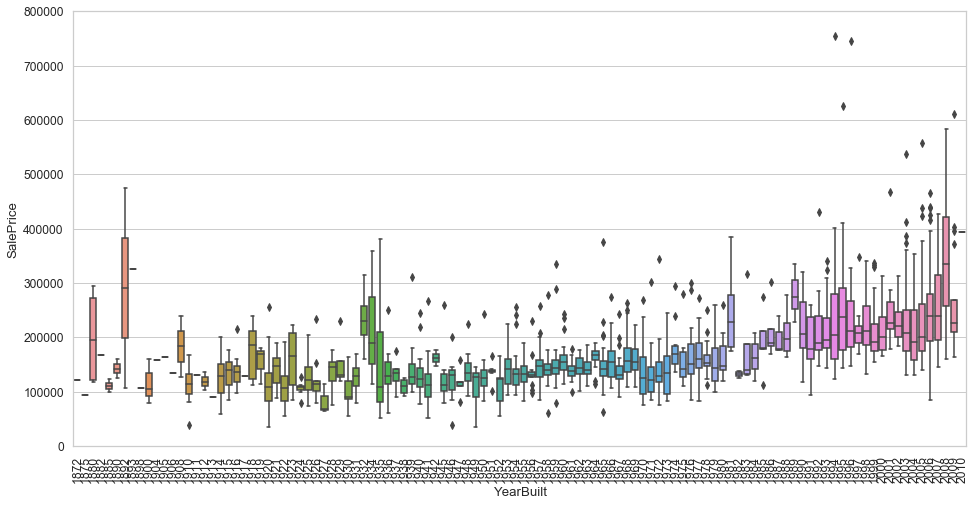

In [62]:
var = 'YearBuilt'
data = pd.concat([clean_df['SalePrice'], clean_df[var]], axis=1)
f, ax = plt.subplots(figsize=(16, 8))
fig = sns.boxplot(x=var, y="SalePrice", data=data)
fig.axis(ymin=0, ymax=800000);
plt.xticks(rotation=90);


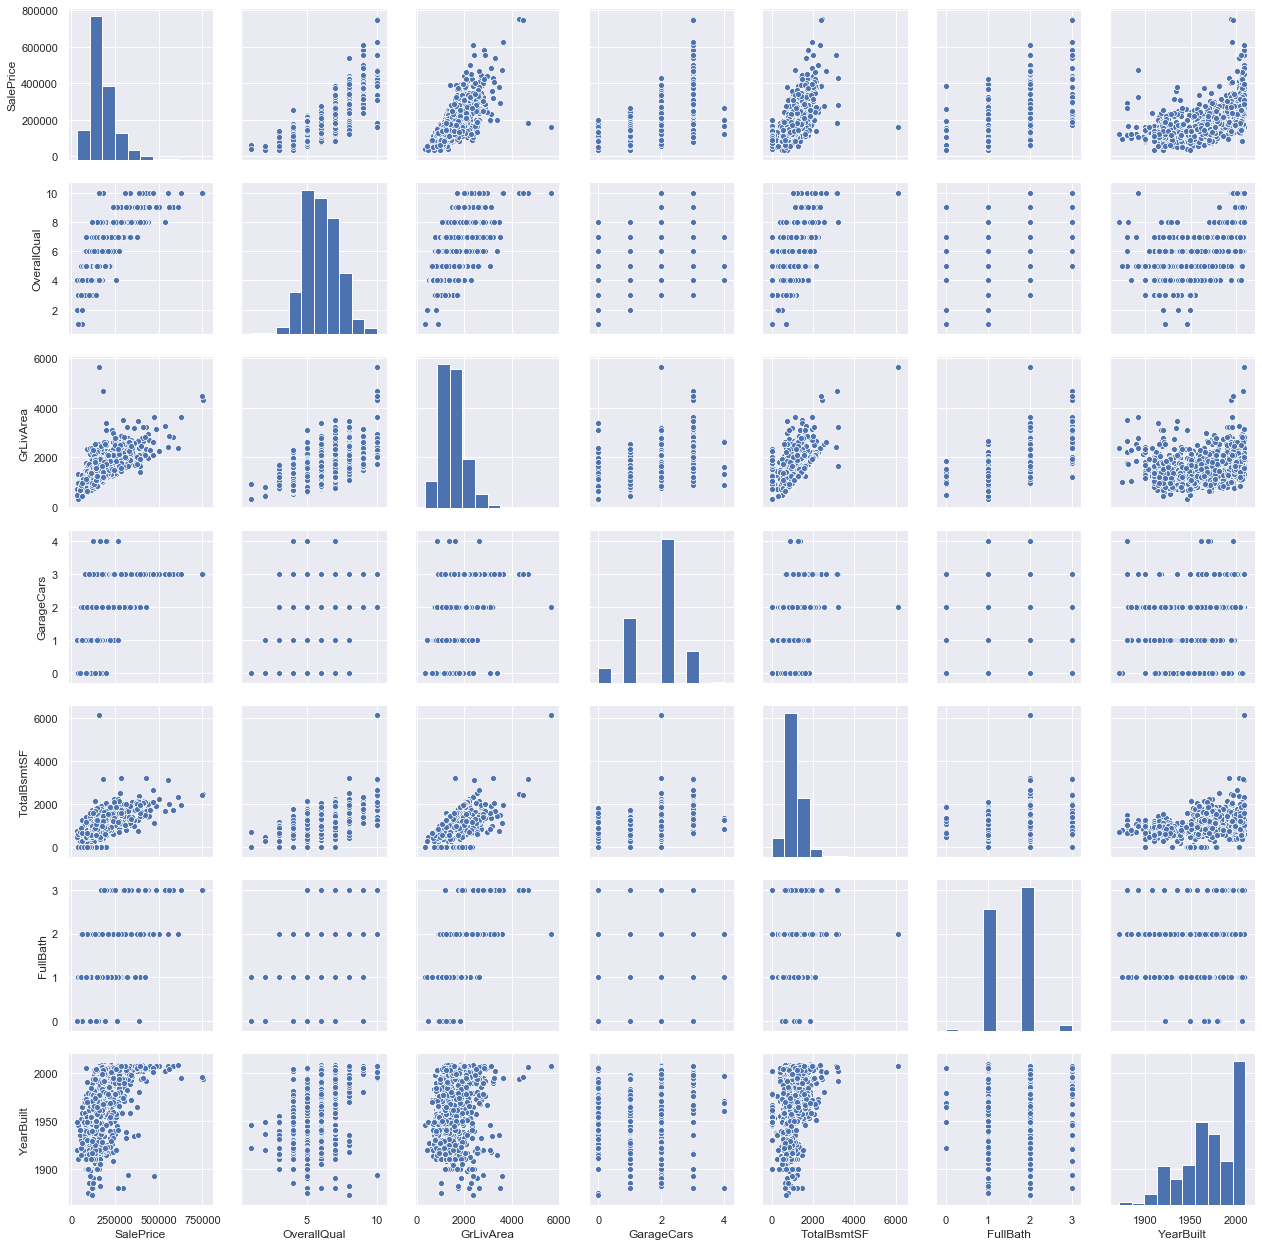

In [78]:
#scatterplot
sns.set()
cols = ['SalePrice', 'OverallQual', 'GrLivArea', 'GarageCars', 'TotalBsmtSF', 'FullBath', 'YearBuilt']
sns.pairplot(clean_df[cols], size = 2.5)
plt.show();